In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




from sklearn.neighbors import KNeighborsClassifier



# Import

In [2]:
data = load_wine(as_frame=True)

In [3]:
df = data.frame

## .

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [5]:
X = df [["proline","hue"]]
y = df.target

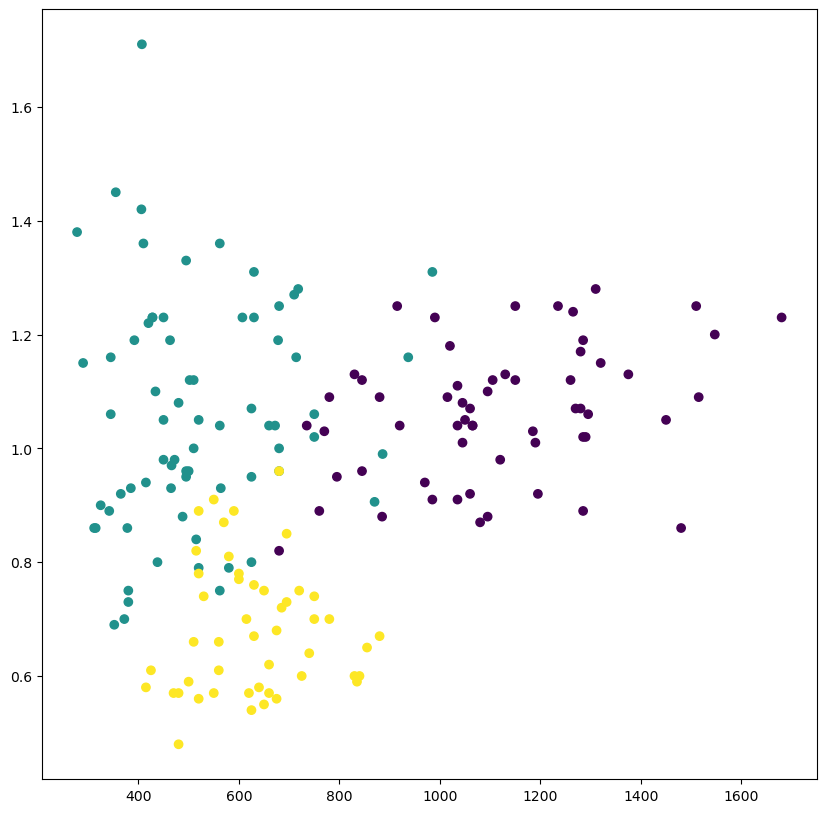

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(x=X.proline, y=X.hue, c=y)

### Without Scaler

In [7]:
KNN = KNeighborsClassifier(n_neighbors=20).fit(X,y)

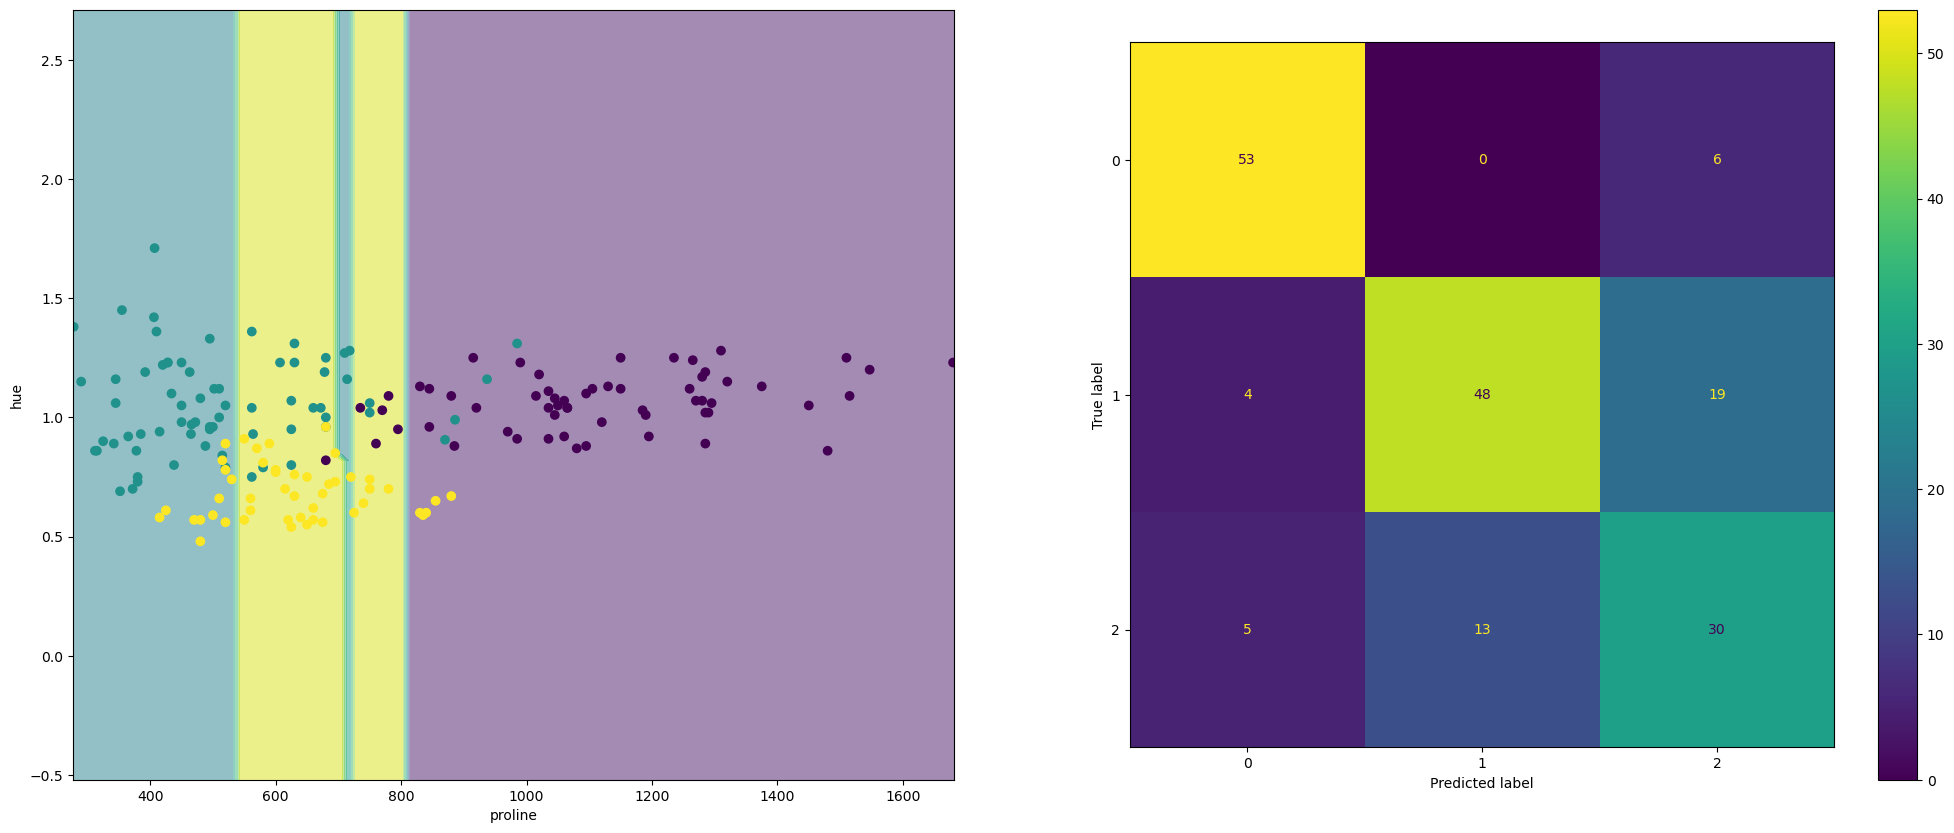

In [8]:
fig, (ax1, ax2)= plt.subplots(ncols=2,figsize=(25, 10))
DBD = DecisionBoundaryDisplay.from_estimator(KNN, X, response_method="predict", alpha=0.5, ax=ax1)
DBD.ax_.scatter(x=X.proline, y=X.hue, c=y)
ConfusionMatrixDisplay(confusion_matrix(y,KNN.predict(X))).plot(ax=plt.gca())
plt.show()

### With Scaler

In [9]:
scaler = StandardScaler()

In [10]:
X_scaled = scaler.fit_transform(X)

In [11]:
KNN_scaled = KNeighborsClassifier(n_neighbors=20).fit(X_scaled,y)

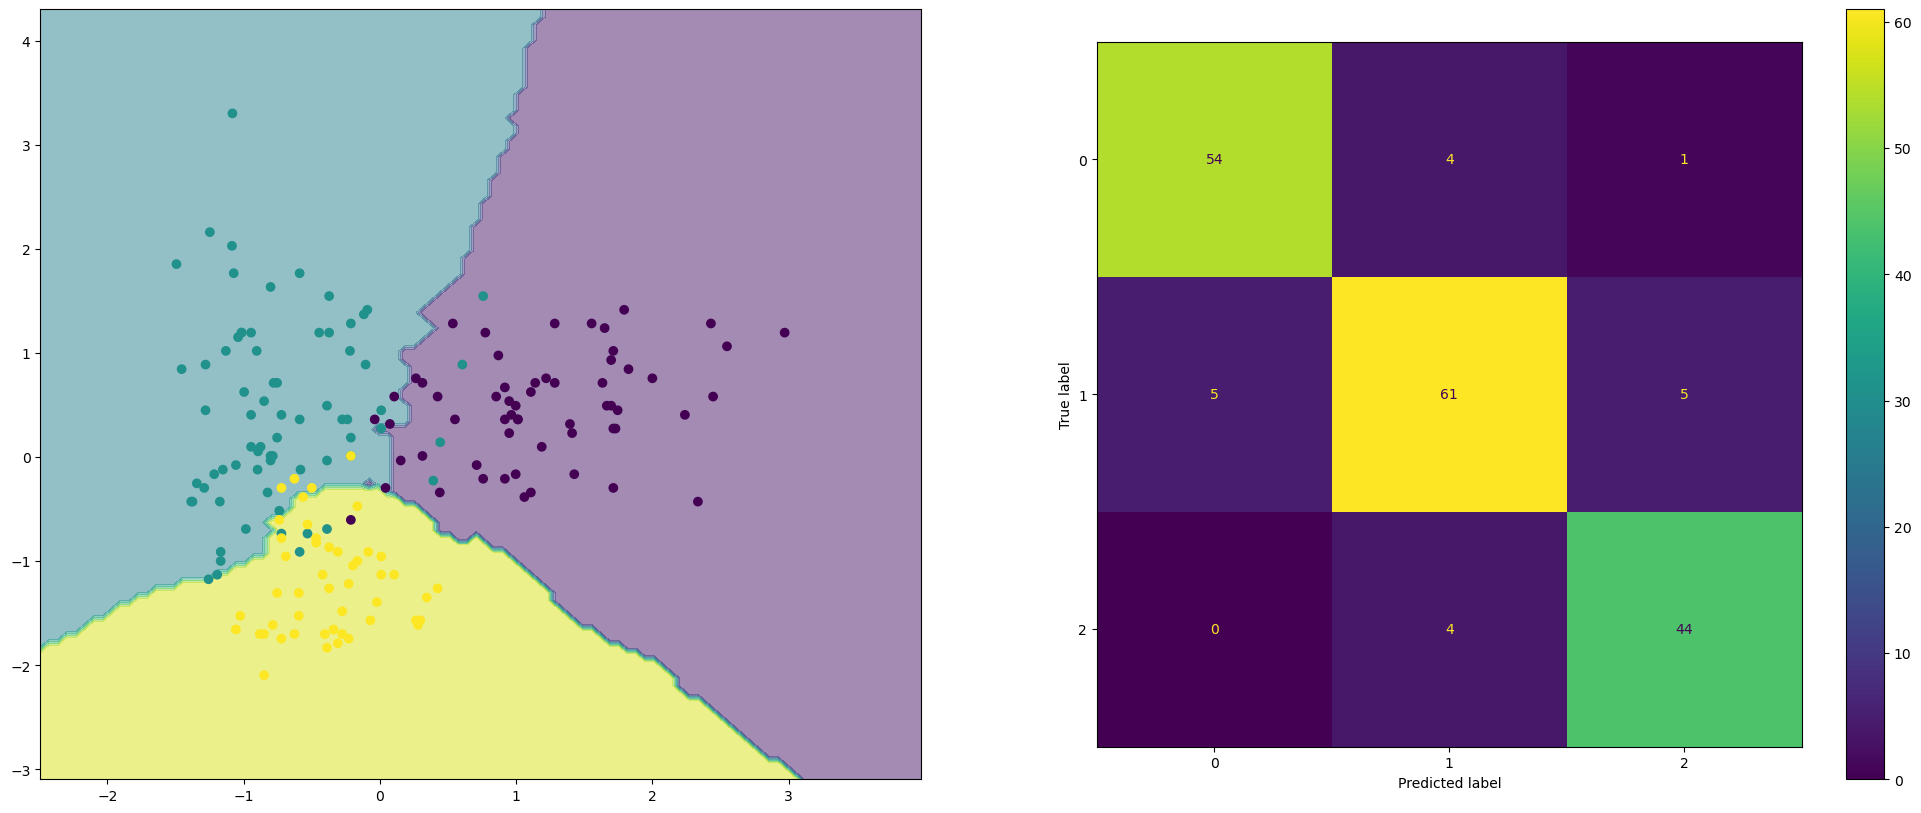

In [12]:
fig, (ax1, ax2)= plt.subplots(ncols=2,figsize=(25, 10))
DBD_scaled = DecisionBoundaryDisplay.from_estimator(KNN_scaled,X_scaled,response_method="predict",alpha=0.5, ax=ax1)
DBD_scaled.ax_.scatter(x=X_scaled[:,0], y=X_scaled[:,1],c=y)
ConfusionMatrixDisplay(confusion_matrix(y,KNN_scaled.predict(X_scaled))).plot(ax=plt.gca())
plt.show()